# ***Performance Test***

In [1]:
# Performance Testing
# import pstats
# import cProfile
# from ww_models.WWModel import Model, Site, SolarPVPanel, SolarPVArray, Load, Grid, Inverter, Battery
# from misc.log_config import configure_logging
# configure_logging()
# cProfile.run("Model(site=Site(latitude=54.60452, longitude=-5.92860), arrays=[SolarPVArray(SolarPVPanel(), 3, 35, 83), SolarPVArray(SolarPVPanel(), 3, 35, 0), SolarPVArray(SolarPVPanel(), 3, 35, -97)], storage=Battery(), load=Load(), grid=Grid(), inverter=Inverter())", 'performance_test.prof')
# p = pstats.Stats('performance_test.prof')
# p.sort_stats('tottime').print_stats()
# p.sort_stats('cumtime').print_stats()

# ***EXAMPLE: WW_Model implementation***

### Basic implementation using default values

In [3]:
from ww_models.WWModel import Model, Site, SolarPVPanel, SolarPVArray, Load, Grid, Inverter, Battery

from misc.log_config import configure_logging
configure_logging()

# Initialise Site class with desired location
site = Site(latitude=54.60452, longitude=-5.92860)

# Initialise Load class, in this setting average daily energy use
load = Load(9.91)

# Initialise PV Panel, and Array class. Then add array(s) to list
pv_panel = SolarPVPanel()
pv_array_1 = SolarPVArray(pv_panel, 3, 35, 83)
pv_array_2 = SolarPVArray(pv_panel, 3, 35, 0)
pv_array_3 = SolarPVArray(pv_panel, 3, 35, -97)
pv_arrays = [pv_array_1, pv_array_2, pv_array_3]


# Initialise Grid, Inverter and Battery class with desired parameters.
grid = Grid()
inverter = Inverter()
battery = Battery()

# Run model with desired parameters created earlier. Parameters not passed through will not be included.
model = Model(site=site, load=load, grid=grid, arrays=pv_arrays, inverter=inverter, battery=battery)



2024-04-17 19:27:21,042 - INFO - Fetching TMY data for Site at latitude: 54.60452, longitude: -5.9286
2024-04-17 19:27:21,043 - INFO - TMY data obtained for Site at latitude: 54.60452, longitude: -5.9286
2024-04-17 19:27:21,043 - INFO - *******************
2024-04-17 19:27:21,069 - INFO - Load Profile Generated:
Daily Electricity Use: 9.957kWh
Annual Electricity Use: 3634.3050000000003kWh
Daily Variability: 15.0%
Hourly Variability: 10.0%
2024-04-17 19:27:21,069 - INFO - *******************
2024-04-17 19:27:21,070 - INFO - Solar PV Panel created: Size: 0.3538kW, Size: 2.0m2, Efficiency: 22.37%, Lifespan: 25yrs
2024-04-17 19:27:21,071 - INFO - *******************
2024-04-17 19:27:21,071 - INFO - Solar PV array created: Size: 1.061kW, Size: 6.0m2, Azimuth: 83deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-17 19:27:21,073 - INFO - Solar PV array created: Size: 1.061kW, Size: 6.0m2, Azimuth: 0deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-17 19:27:21,073 - IN

Processing took: 75.40 milliseconds


###  Model implementation using values loaded from module csv sheet

In [1]:
from ww_models.WWModel import Model, Site, SolarPVPanel, SolarPVArray, Load, Grid, Inverter, Battery

from misc.log_config import configure_logging
configure_logging()

# Initialise Site class with desired location
site = Site(latitude=54.60452, longitude=-5.92860)

# Initialise Load class, in this setting average daily energy use
load = Load(9.91)

# Initialise PV Panel, and Array class. Then add array(s) to list
pv_panel = SolarPVPanel(load_panel_name="Default")
pv_array_1 = SolarPVArray(pv_panel, 3, 35, 83)
pv_array_2 = SolarPVArray(pv_panel, 3, 35, 0)
pv_array_3 = SolarPVArray(pv_panel, 3, 35, -97)
pv_arrays = [pv_array_1, pv_array_2, pv_array_3]


# Initialise Grid, Inverter and Battery class with desired parameters.
grid = Grid(import_limit=999999, export_limit=12)
inverter = Inverter(load_inverter_name="Default")
battery = Battery(load_battery_name="Default")

# Run model with desired parameters created earlier. Parameters not passed through will not be included.
model = Model(site=site, load=load, grid=grid, arrays=pv_arrays, inverter=inverter, battery=battery)

# Return sum values of model.model dataframe.
model.model.sum()


2024-04-17 19:27:15,739 - INFO - Fetching TMY data for Site at latitude: 54.60452, longitude: -5.9286
2024-04-17 19:27:16,847 - INFO - HTTP Request: GET https://re.jrc.ec.europa.eu/api/tmy?lat=54.60452&lon=-5.9286&startyear=2005&endyear=2015&outputformat=json "HTTP/1.1 200 OK"
2024-04-17 19:27:17,202 - INFO - TMY data obtained for Site at latitude: 54.60452, longitude: -5.9286
2024-04-17 19:27:17,202 - INFO - *******************
2024-04-17 19:27:17,232 - INFO - Load Profile Generated:
Daily Electricity Use: 9.862kWh
Annual Electricity Use: 3599.63kWh
Daily Variability: 15.0%
Hourly Variability: 10.0%
2024-04-17 19:27:17,232 - INFO - *******************
2024-04-17 19:27:17,269 - INFO - Solar PV Panel created: Size: 0.354kW, Size: 2.0m2, Efficiency: 22.37%, Lifespan: 25yrs
2024-04-17 19:27:17,270 - INFO - *******************
2024-04-17 19:27:17,271 - INFO - Solar PV array created: Size: 1.062kW, Size: 6.0m2, Azimuth: 83deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-17 19:

Processing took: 743.08 milliseconds


Energy_Use_kWh                   3599.555
Renewable_Energy_Use_kWh         2107.868
Grid_Imports_kWh                 1491.663
Grid_Exports_kWh                  433.330
PV_Gen_kWh_Total                 2765.421
PV_AC_Output_kWh                 2627.140
Consumed_Solar_kWh               1256.075
Excess_Solar_kWh                 1371.099
Battery_SoC_kWh                 34303.055
Battery_Charge_kWh                937.741
Battery_Discharge_kWh             851.769
Unused_Energy_kWh                2862.762
Combined_PV_Losses_kWh_Total      190.118
Inverter_Losses_kWh               131.328
Battery_Losses_kWh                 44.823
Inverter_Limited_kWh                0.000
Import_Limited                      0.000
Export_Limited                      0.000
dtype: float64

In [3]:
model.arrays

[SolarPVArray(pv_panel=SolarPVPanel(panel_kwp=0.354, size_m2=2.0, eff=0.2237, cell_temp_coeff=-0.004, cell_NOCT=48.0, lifespan=25, pv_eol_derating=0.88, refraction_index=0.05, I_sc=11.21, V_oc=48.3, I_mp=10.7, V_mp=41.6, material=-0.004, bifacial=False, length_m=1.21, width_m='Mono-crystalline', e_poa_STC=1000, cell_temp_STC=25, load_panel_name='Default'), num_panels=3, surface_pitch=35, surface_azimuth=83, albedo=0.2, pv_kwp=1.062, area_m2=6.0, I_sc=11.21, V_oc=144.9, I_mp=10.7, V_mp=124.8),
 SolarPVArray(pv_panel=SolarPVPanel(panel_kwp=0.354, size_m2=2.0, eff=0.2237, cell_temp_coeff=-0.004, cell_NOCT=48.0, lifespan=25, pv_eol_derating=0.88, refraction_index=0.05, I_sc=11.21, V_oc=48.3, I_mp=10.7, V_mp=41.6, material=-0.004, bifacial=False, length_m=1.21, width_m='Mono-crystalline', e_poa_STC=1000, cell_temp_STC=25, load_panel_name='Default'), num_panels=3, surface_pitch=35, surface_azimuth=0, albedo=0.2, pv_kwp=1.062, area_m2=6.0, I_sc=11.21, V_oc=144.9, I_mp=10.7, V_mp=124.8),
 Sola

In [4]:
print("*************")
print(f"Renewable Fraction: {model.model.Renewable_Energy_Use_kWh.sum() / model.model.Energy_Use_kWh.sum() * 100:.2f}%")

*************
Renewable Fraction: 58.58%


## ***KNOCKAVOE SCHOOL - SMART METER DATA EXAMPLE***

In [2]:
from ww_models.WWModel import Model, Site, SolarPVPanel, SolarPVArray, Load, Grid, Inverter, Battery

from misc.log_config import configure_logging
configure_logging()

# Initialise Site class with desired location
site = Site(latitude=54.8183, longitude=-7.4741)

# Initialise PV Panel, and Array class. Then add array(s) to list
pv_panel = SolarPVPanel(load_panel_name="Default")
pv_array_1 = SolarPVArray(pv_panel, 340, 35, -30)
pv_arrays = [pv_array_1]

# Initialise Load class, in this case loading and formatting specific smart meter data from declared path
lp_path = "demand/load_profiles/Knockavoe_Load_23_24.csv"
load = Load(load_profile_path=lp_path)

# Initialise Grid, Inverter and Battery class with desired parameters.
grid = Grid(import_limit=999999, export_limit=120)
inverter = Inverter(max_output=120)
battery = Battery(100)

# Run model with desired parameters created earlier. Parameters not passed through will not be included.
model = Model(site=site, load=load, grid=grid, arrays=pv_arrays, inverter=inverter, battery=battery,)

# Return sum values of model.model dataframe.
model.model.sum()

2024-04-17 15:44:34,084 - INFO - Fetching TMY data for Site at latitude: 54.8183, longitude: -7.4741
2024-04-17 15:44:34,085 - INFO - TMY data obtained for Site at latitude: 54.8183, longitude: -7.4741
2024-04-17 15:44:34,085 - INFO - *******************
2024-04-17 15:44:34,124 - INFO - Solar PV Panel created: Size: 0.354kW, Size: 2.0m2, Efficiency: 22.37%, Lifespan: 25yrs
2024-04-17 15:44:34,125 - INFO - *******************
2024-04-17 15:44:34,126 - INFO - Solar PV array created: Size: 120.36kW, Size: 680.0m2, Azimuth: -30deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-17 15:44:34,265 - INFO - Load Profile Generated: Daily Electricity Use: 625.019kWh, Annual Electricity Use: 228131.935kWh, Daily Variability: 15.0%, Hourly Variability: 10.0%
2024-04-17 15:44:34,266 - INFO - *******************
2024-04-17 15:44:34,267 - INFO - Inverter Created: Max Output: 120kW, Inverter Efficiency: 0.95%, Battery Charging: True
2024-04-17 15:44:34,267 - INFO - *******************
2024-0

Processing took: 55.56 milliseconds


Energy_Use_kWh                  228131.940
Renewable_Energy_Use_kWh         62777.005
Grid_Imports_kWh                165354.935
Grid_Exports_kWh                 38098.226
PV_Gen_kWh_Total                106828.460
PV_AC_Output_kWh                101487.060
Consumed_Solar_kWh               57016.327
Excess_Solar_kWh                 44470.733
Battery_SoC_kWh                  30209.428
Battery_Charge_kWh                6372.536
Battery_Discharge_kWh             5760.692
Unused_Energy_kWh                 6372.506
Combined_PV_Losses_kWh_Total      7245.169
Inverter_Losses_kWh               5074.351
Battery_Losses_kWh                 303.201
Inverter_Limited_kWh                 0.000
Import_Limited                       0.000
Export_Limited                       0.000
dtype: float64

In [6]:
model.load.load_profile

,DateTime,Energy_Use_kWh
0,2024-01-01 08:00:00,23.611
1,2024-01-01 09:00:00,20.655
2,2024-01-01 12:00:00,22.206
3,2024-01-01 16:00:00,22.668
4,2024-01-01 21:00:00,18.248
...,...,...
8755,2023-12-31 18:00:00,17.828
8756,2023-12-31 20:00:00,18.228
8757,2023-12-31 02:00:00,16.688
8758,2023-12-31 03:00:00,16.599


In [7]:
print("*************")
print(f"Renewable Fraction: {model.model.Renewable_Energy_Use_kWh.sum() / model.model.Energy_Use_kWh.sum() * 100:.2f}%")

*************
Renewable Fraction: 27.52%


In [8]:
import plotly.express as px
px.line(model.model[["Grid_Imports_kWh", "Grid_Exports_kWh", "PV_AC_Output_kWh",
                     "Battery_Charge_kWh", "Battery_Discharge_kWh"]][2675:2750])

In [9]:
model.pv_model.summary

2024-04-15 20:43:16,838 - INFO - Generating Solar PV model statistical analysis for Site.
2024-04-15 20:43:16,841 - INFO - Solar PV model statistical analysis for Site completed.
2024-04-15 20:43:16,841 - INFO - *******************


Total_PV_Capacity_kWp                120.360
PV_kWh_kWp_Annual                    887.575
Total_Area_Covered_m2                680.000
PV_kWh_m2_Annual                     157.101
PV_Gen_kWh_Annual                 106828.470
PV_Gen_kWh_Lifetime              2504059.345
E_POA_kWm2_Annual                    950.424
Panel_POA_kWm2_Annual                940.723
IAM_Loss_kWh_Annual                 1106.739
PV_Thermal_Loss_kWh_Annual          1220.422
Low_Light_Loss_kWh_Annual           4918.023
Combined_PV_Losses_kWh_Annual       7245.184
E_Beam_kWm2_Annual                   416.039
E_Diffuse_kWm2_Annual                518.177
E_Ground_kWm2_Annual                  16.208
ET_HRad_kWm2_Annual                 2261.014
Array_Temp_C_Avg                      12.185
Ambient_Temperature_C_Avg              9.649
dtype: float64

In [10]:
model.pv_model.grouped.monthly

2024-04-15 20:43:16,851 - INFO - Generating Solar PV model statistical grouping for Site.
2024-04-15 20:43:16,869 - INFO - Solar PV model statistical grouping for Site completed.
2024-04-15 20:43:16,870 - INFO - *******************


,PV_Gen_kWh_Total,E_POA_kWm2_Avg,Panel_POA_kWm2_Avg,IAM_Loss_kWh_Total,PV_Thermal_Loss_kWh_Total,Low_Light_Loss_kWh_Total,Combined_PV_Losses_kWh_Total,E_Beam_kWm2_Avg,E_Diffuse_kWm2_Avg,E_Ground_kWm2_Avg,ET_HRad_kWm2_Avg,Array_Temp_C_Avg,Ambient_Temperature_C
Month_of_Year,,,,,,,,,,,,,
1,1644.077,15.499,15.225,30.574,0.000,188.000,218.573,7.528,7.766,0.205,53.853,6.228,5.750
2,4731.180,42.727,41.799,104.165,3.079,293.634,400.878,24.569,17.576,0.582,88.614,7.769,6.335
3,6177.811,55.582,55.128,52.997,1.119,449.641,503.756,19.752,34.901,0.929,170.681,5.265,3.566
4,15490.351,136.171,134.810,156.519,273.890,438.587,868.995,75.839,58.040,2.293,247.009,15.603,11.156
5,17183.064,150.203,148.931,146.503,204.534,505.786,856.823,67.985,79.507,2.711,323.750,15.474,10.849
6,14127.347,124.990,123.893,123.901,154.866,597.155,875.921,41.018,81.609,2.363,343.058,16.079,11.963
7,13519.165,120.629,119.703,104.749,224.068,627.141,955.958,39.086,79.328,2.215,339.005,18.416,14.389
8,13859.706,122.812,121.868,108.463,217.779,546.532,872.774,50.729,69.920,2.163,280.432,18.169,14.338
9,8859.368,79.509,78.698,92.643,108.344,472.455,673.441,34.695,43.494,1.320,192.595,15.823,13.219


# **Example: PV_Only model for multiple site locations and arrays:**

In [11]:
from ww_models.PVOnly import Site, SolarPVPanel, SolarPVArray, PV_Only
from misc.log_config import configure_logging
configure_logging()

# Initialise sites to be modelled
site_1 = Site(name="Belfast", latitude=54.60452, longitude=-5.92860)
site_2 = Site(name="Paris", latitude=48.8562, longitude=2.3477)
site_3 = Site(name="Madrid", latitude=40.4202, longitude=-3.6988)
site_4 = Site(name="Cairo", latitude=30.1098, longitude=-3.6988)
site_5 = Site(name="Abuja", latitude=9.0591, longitude=31.2235)

sites = [site_1, site_2, site_3, site_4, site_5]

# Configure Solar Panels to be used in arrays
pv_panel = SolarPVPanel()
pv_panel_2 = SolarPVPanel()

# Configure Solar Arrays from panels and system characteristics
pv_array_1 = SolarPVArray(pv_panel, 3, 35, -90)
pv_array_2 = SolarPVArray(pv_panel, 3, 35, -45)
pv_array_3 = SolarPVArray(pv_panel, 3, 35, 0)
pv_array_4 = SolarPVArray(pv_panel, 3, 35, 45)
pv_array_5 = SolarPVArray(pv_panel, 3, 35, 90)

pv_array_6 = SolarPVArray(pv_panel_2, 3, 35, 90)
pv_array_7 = SolarPVArray(pv_panel_2, 3, 35, 0)
pv_array_8 = SolarPVArray(pv_panel_2, 3, 35, -90)

# Combine solar arrays into individual systems to be modelled
pv_arrays_1 = [pv_array_1, pv_array_2, pv_array_3, pv_array_4, pv_array_5]
pv_arrays_2 = [pv_array_6, pv_array_7, pv_array_8]
arrays = [pv_arrays_1, pv_arrays_2]

# Add to Project class for further work.
project = PV_Only(sites=sites, arrays=arrays)

print()
print(f"{project.pv_models.Belfast['Belfast_1'].summary.PV_Gen_kWh_Annual:.3f} kWh annually - Belfast")
print(f"{project.pv_models.Paris['Paris_1'].summary.PV_Gen_kWh_Annual:.3f} kWh annually - Paris")
print(f"{project.pv_models.Madrid['Madrid_1'].summary.PV_Gen_kWh_Annual:.3f} kWh annually - Madrid")
print(f"{project.pv_models.Cairo['Cairo_1'].summary.PV_Gen_kWh_Annual:.3f} kWh annually - Cairo")
print(f"{project.pv_models.Abuja['Abuja_1'].summary.PV_Gen_kWh_Annual:.3f} kWh annually - Abuja")


2024-04-15 20:43:16,899 - INFO - Fetching TMY data for Belfast at latitude: 54.60452, longitude: -5.9286
2024-04-15 20:43:16,901 - INFO - TMY data obtained for Belfast at latitude: 54.60452, longitude: -5.9286
2024-04-15 20:43:16,901 - INFO - *******************
2024-04-15 20:43:16,902 - INFO - Fetching TMY data for Paris at latitude: 48.8562, longitude: 2.3477
2024-04-15 20:43:17,914 - INFO - HTTP Request: GET https://re.jrc.ec.europa.eu/api/tmy?lat=48.8562&lon=2.3477&startyear=2005&endyear=2015&outputformat=json "HTTP/1.1 200 OK"
2024-04-15 20:43:18,261 - INFO - TMY data obtained for Paris at latitude: 48.8562, longitude: 2.3477
2024-04-15 20:43:18,262 - INFO - *******************
2024-04-15 20:43:18,263 - INFO - Fetching TMY data for Madrid at latitude: 40.4202, longitude: -3.6988
2024-04-15 20:43:19,153 - INFO - HTTP Request: GET https://re.jrc.ec.europa.eu/api/tmy?lat=40.4202&lon=-3.6988&startyear=2005&endyear=2015&outputformat=json "HTTP/1.1 200 OK"
2024-04-15 20:43:19,531 - INFO


4741.066 kWh annually - Belfast
6158.238 kWh annually - Paris
8960.507 kWh annually - Madrid
10541.141 kWh annually - Cairo
8977.115 kWh annually - Abuja


In [12]:
for site in project.sites:
    print(site.tmy_data["G(h)"].sum()/1000)

943.7153500000001
1233.6499
1826.7363500000001
2271.17575
2109.4402


In [13]:
for site in project.pv_models:
    for model in project.pv_models[f"{site}"]:
        print(f"{model} Results:")
        print("***")
        print(project.pv_models[f"{site}"][f"{model}"].summary)
        print("")

2024-04-15 20:43:23,429 - INFO - Generating Solar PV model statistical analysis for Belfast.
2024-04-15 20:43:23,431 - INFO - Solar PV model statistical analysis for Belfast completed.
2024-04-15 20:43:23,432 - INFO - *******************
2024-04-15 20:43:23,433 - INFO - Generating Solar PV model statistical analysis for Paris.
2024-04-15 20:43:23,435 - INFO - Solar PV model statistical analysis for Paris completed.
2024-04-15 20:43:23,435 - INFO - *******************
2024-04-15 20:43:23,436 - INFO - Generating Solar PV model statistical analysis for Madrid.
2024-04-15 20:43:23,438 - INFO - Solar PV model statistical analysis for Madrid completed.
2024-04-15 20:43:23,439 - INFO - *******************
2024-04-15 20:43:23,441 - INFO - Generating Solar PV model statistical analysis for Cairo.
2024-04-15 20:43:23,443 - INFO - Solar PV model statistical analysis for Cairo completed.
2024-04-15 20:43:23,443 - INFO - *******************
2024-04-15 20:43:23,445 - INFO - Generating Solar PV model

Belfast_1 Results:
***
Total_PV_Capacity_kWp                 5.307
PV_kWh_kWp_Annual                   893.361
Total_Area_Covered_m2                30.000
PV_kWh_m2_Annual                    158.036
PV_Gen_kWh_Annual                  4741.066
PV_Gen_kWh_Lifetime              111130.577
E_POA_kWm2_Annual                   956.222
Panel_POA_kWm2_Annual               944.607
IAM_Loss_kWh_Annual                  58.317
PV_Thermal_Loss_kWh_Annual           38.601
Low_Light_Loss_kWh_Annual           219.847
Combined_PV_Losses_kWh_Annual       316.765
E_Beam_kWm2_Annual                  421.631
E_Diffuse_kWm2_Annual               517.524
E_Ground_kWm2_Annual                 17.067
ET_HRad_kWm2_Annual                2270.579
Array_Temp_C_Avg                     11.311
Ambient_Temperature_C_Avg             8.899
dtype: float64

Belfast_2 Results:
***
Total_PV_Capacity_kWp                3.184
PV_kWh_kWp_Annual                  867.602
Total_Area_Covered_m2               18.000
PV_kWh_m2_Annual 

In [14]:
for site in project.pv_models.keys():
    print(f"Site Name: {site}")
    model_indices = project.pv_models[site].keys()
    print(f"Site Models: {list(model_indices)}")

Site Name: Belfast
Site Models: ['Belfast_1', 'Belfast_2']
Site Name: Paris
Site Models: ['Paris_1', 'Paris_2']
Site Name: Madrid
Site Models: ['Madrid_1', 'Madrid_2']
Site Name: Cairo
Site Models: ['Cairo_1', 'Cairo_2']
Site Name: Abuja
Site Models: ['Abuja_1', 'Abuja_2']


In [15]:
project.pv_models.Belfast.Belfast_1.grouped.daily

2024-04-15 20:43:23,466 - INFO - Generating Solar PV model statistical grouping for Belfast.
2024-04-15 20:43:23,482 - INFO - Solar PV model statistical grouping for Belfast completed.
2024-04-15 20:43:23,483 - INFO - *******************


,PV_Gen_kWh_Total,E_POA_kWm2_Avg,Panel_POA_kWm2_Avg,IAM_Loss_kWh_Total,PV_Thermal_Loss_kWh_Total,Low_Light_Loss_kWh_Total,Combined_PV_Losses_kWh_Total,E_Beam_kWm2_Avg,E_Diffuse_kWm2_Avg,E_Ground_kWm2_Avg,ET_HRad_kWm2_Avg,Array_Temp_C_Avg,Ambient_Temperature_C
Day_of_Year,,,,,,,,,,,,,
1,0.458,0.108,0.108,0.000,0.0,0.116,0.116,0.000,0.106,0.002,1.382,1.513,1.417
2,1.672,0.379,0.372,0.034,0.0,0.303,0.336,0.143,0.230,0.006,1.395,2.824,2.522
3,1.611,0.362,0.355,0.035,0.0,0.275,0.310,0.148,0.209,0.006,1.412,2.005,1.600
4,2.857,0.624,0.607,0.085,0.0,0.363,0.448,0.338,0.278,0.008,1.429,3.270,2.676
5,3.494,0.756,0.731,0.125,0.0,0.381,0.506,0.463,0.283,0.010,1.448,2.803,2.215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,4.170,0.898,0.865,0.160,0.0,0.398,0.558,0.595,0.293,0.011,1.338,4.477,3.663
362,3.366,0.723,0.700,0.111,0.0,0.332,0.443,0.411,0.302,0.010,1.344,5.355,4.654
363,1.527,0.349,0.342,0.033,0.0,0.279,0.312,0.123,0.220,0.006,1.352,5.824,5.499


In [16]:
project.pv_models.Belfast.Belfast_1.summary

Total_PV_Capacity_kWp                 5.307
PV_kWh_kWp_Annual                   893.361
Total_Area_Covered_m2                30.000
PV_kWh_m2_Annual                    158.036
PV_Gen_kWh_Annual                  4741.066
PV_Gen_kWh_Lifetime              111130.577
E_POA_kWm2_Annual                   956.222
Panel_POA_kWm2_Annual               944.607
IAM_Loss_kWh_Annual                  58.317
PV_Thermal_Loss_kWh_Annual           38.601
Low_Light_Loss_kWh_Annual           219.847
Combined_PV_Losses_kWh_Annual       316.765
E_Beam_kWm2_Annual                  421.631
E_Diffuse_kWm2_Annual               517.524
E_Ground_kWm2_Annual                 17.067
ET_HRad_kWm2_Annual                2270.579
Array_Temp_C_Avg                     11.311
Ambient_Temperature_C_Avg             8.899
dtype: float64

In [17]:
project.pv_models.Abuja.Abuja_1.summary

Total_PV_Capacity_kWp                 5.307
PV_kWh_kWp_Annual                  1691.561
Total_Area_Covered_m2                30.000
PV_kWh_m2_Annual                    299.237
PV_Gen_kWh_Annual                  8977.115
PV_Gen_kWh_Lifetime              210423.578
E_POA_kWm2_Annual                  1946.384
Panel_POA_kWm2_Annual              1922.336
IAM_Loss_kWh_Annual                 111.837
PV_Thermal_Loss_kWh_Annual         1047.480
Low_Light_Loss_kWh_Annual           149.516
Combined_PV_Losses_kWh_Annual      1308.832
E_Beam_kWm2_Annual                 1203.728
E_Diffuse_kWm2_Annual               704.508
E_Ground_kWm2_Annual                 38.149
ET_HRad_kWm2_Annual                3593.141
Array_Temp_C_Avg                     34.627
Ambient_Temperature_C_Avg            28.828
dtype: float64

# ***SolarPVModel FUNCTIONALITY***

In [18]:
import pandas as pd
import plotly.express as px

from meteo.Site import Site
from solar.SolarPVPanel import SolarPVPanel
from solar.SolarPVArray import SolarPVArray
from solar.SolarPVModel import SolarPVModel

from misc.log_config import configure_logging

configure_logging()
pd.options.display.float_format = '{:.3f}'.format

# Set up site location and get TMY data
name = ""
address = "York St, Belfast, BT15 1ED"
client = "Ulster University"

site = Site(name=name, 
            address=address, 
            client=client, 
            latitude=54.60452, 
            longitude=-5.92860, 
            size=100)

# Set up PV panel being used
panel_kwp = 0.3538
size_m2 = 1.990
eff = 0.2237
cell_temp_coeff = -0.004
cell_NOCT = 48
lifespan = 25
pv_eol_derating = 0.88
refraction_index = 0.05

pv_panel = SolarPVPanel(panel_kwp, size_m2, eff, cell_temp_coeff, 
                        cell_NOCT, lifespan, pv_eol_derating, refraction_index)


# Set up PV arrays
num_pv_panels = 3
surface_pitch = 35
surface_azimuth = -90
albedo = 0.2
cost_per_kWp = 1250

pv_array_1 = SolarPVArray(pv_panel, num_pv_panels, surface_pitch, surface_azimuth, albedo, cost_per_kWp)
pv_array_2 = SolarPVArray(pv_panel, num_pv_panels, surface_pitch, -45)
pv_array_3 = SolarPVArray(pv_panel, num_pv_panels, surface_pitch, 0)
pv_array_4 = SolarPVArray(pv_panel, num_pv_panels, surface_pitch, 45)
pv_array_5 = SolarPVArray(pv_panel, num_pv_panels, surface_pitch, 90)

pv_arrays = [pv_array_1, pv_array_2, pv_array_3, pv_array_4, pv_array_5]


# Run the model
pv_model = SolarPVModel(site, pv_arrays)

print("")
print(f"{sum(array.pv_kwp for array in pv_model.arrays)}kWp Solar PV modelled covering a {sum(array.area_m2 for array in pv_model.arrays)}m2 area.")


2024-04-15 20:43:23,641 - INFO - Fetching TMY data for  at latitude: 54.60452, longitude: -5.9286
2024-04-15 20:43:23,642 - INFO - TMY data obtained for  at latitude: 54.60452, longitude: -5.9286
2024-04-15 20:43:23,642 - INFO - *******************
2024-04-15 20:43:23,643 - INFO - Solar PV Panel created: Size: 0.3538kW, Size: 1.99m2, Efficiency: 22.37%, Lifespan: 25yrs
2024-04-15 20:43:23,643 - INFO - *******************
2024-04-15 20:43:23,644 - INFO - Solar PV array created: Size: 1.061kW, Size: 5.97m2, Azimuth: -90deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-15 20:43:23,644 - INFO - Solar PV array created: Size: 1.061kW, Size: 5.97m2, Azimuth: -45deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-15 20:43:23,645 - INFO - Solar PV array created: Size: 1.061kW, Size: 5.97m2, Azimuth: 0deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-15 20:43:23,645 - INFO - Solar PV array created: Size: 1.061kW, Size: 5.97m2, Azimuth: 45deg, Lifespan: 25yrs,


5.305kWp Solar PV modelled covering a 29.849999999999998m2 area.


In [19]:
pv_model.combined_model.Combined_PV_Losses_kWh_Total.sum()

316.7651483517745

In [20]:
round(pv_model.combined_model.Combined_PV_Losses_kWh_Total.sum() / pv_model.combined_model.PV_Gen_kWh_Total.sum() * 100, 2)

6.68

In [21]:
a = pv_model.combined_model.PV_Thermal_Loss_kWh_Total.sum() 
b = pv_model.combined_model.Low_Light_Loss_kWh_Total.sum() 
c = pv_model.combined_model.IAM_Loss_kWh_Total.sum()
d = a + b + c
e = pv_model.combined_model.PV_Gen_kWh_Total.sum()
f = d / e * 100

print(f"{a:.2f} kWh Thermal Losses")
print(f"{b:.2f} kWh Low Light Losses")
print(f"{c:.2f} kWh IAM Losses")
print(f"{d:.2f} kWh Total Losses")
print()
print(f"{e:.2f} kWh PV gen annual")
print(f"{f:.2f}% losses")

38.60 kWh Thermal Losses
219.85 kWh Low Light Losses
58.32 kWh IAM Losses
316.77 kWh Total Losses

4741.07 kWh PV gen annual
6.68% losses


In [22]:
pv_model.summary

2024-04-15 20:43:23,769 - INFO - Generating Solar PV model statistical analysis for .
2024-04-15 20:43:23,771 - INFO - Solar PV model statistical analysis for  completed.
2024-04-15 20:43:23,772 - INFO - *******************


Total_PV_Capacity_kWp                5.307
PV_kWh_kWp_Annual                  893.361
Total_Area_Covered_m2               29.850
PV_kWh_m2_Annual                   158.830
PV_Gen_kWh_Annual                 4741.066
PV_Gen_kWh_Lifetime             111130.577
E_POA_kWm2_Annual                  956.222
Panel_POA_kWm2_Annual              944.607
IAM_Loss_kWh_Annual                 58.317
PV_Thermal_Loss_kWh_Annual          38.601
Low_Light_Loss_kWh_Annual          219.847
Combined_PV_Losses_kWh_Annual      316.765
E_Beam_kWm2_Annual                 421.631
E_Diffuse_kWm2_Annual              517.524
E_Ground_kWm2_Annual                17.067
ET_HRad_kWm2_Annual               2270.579
Array_Temp_C_Avg                    11.311
Ambient_Temperature_C_Avg            8.899
dtype: float64

In [23]:
pv_model.grouped.hourly.sum()

2024-04-15 20:43:23,781 - INFO - Generating Solar PV model statistical grouping for .
2024-04-15 20:43:23,797 - INFO - Solar PV model statistical grouping for  completed.
2024-04-15 20:43:23,798 - INFO - *******************


PV_Gen_kWh_Total               4741.066
E_POA_kWm2_Avg                  956.223
Panel_POA_kWm2_Avg              944.607
IAM_Loss_kWh_Total               58.317
PV_Thermal_Loss_kWh_Total        38.602
Low_Light_Loss_kWh_Total        219.847
Combined_PV_Losses_kWh_Total    316.764
E_Beam_kWm2_Avg                 421.631
E_Diffuse_kWm2_Avg              517.526
E_Ground_kWm2_Avg                17.066
ET_HRad_kWm2_Avg               2270.579
Array_Temp_C_Avg                271.468
Ambient_Temperature_C           213.584
dtype: float64

In [24]:
print(pv_model.models[0]["model_result"].E_POA_kWm2.sum())
print(pv_model.models[1]["model_result"].E_POA_kWm2.sum())
print(pv_model.models[2]["model_result"].E_POA_kWm2.sum())
print(pv_model.models[3]["model_result"].E_POA_kWm2.sum())
print(pv_model.models[4]["model_result"].E_POA_kWm2.sum())

869.1227452409016
989.4152531988715
1041.0328100686736
1000.7969560619578
880.7426043828083


In [25]:
px.bar(pv_model.grouped.quarterly[["Combined_PV_Losses_kWh_Total", "PV_Gen_kWh_Total"]])

In [26]:
px.line(pv_model.combined_model.E_POA_kWm2_Avg)

In [27]:
pv_model.combined_model.head()

,E_Beam_kWm2_Avg,E_Diffuse_kWm2_Avg,E_Ground_kWm2_Avg,E_POA_kWm2_Avg,Panel_POA_kWm2_Avg,ET_HRad_kWm2_Avg,PV_Gen_kWh_Total,PV_Thermal_Loss_kWh_Total,Low_Light_Loss_kWh_Total,IAM_Loss_kWh_Total,Combined_PV_Losses_kWh_Total,Array_Temp_C_Avg,Declination_Angle,Solar_Time,Hour_Angle,Ambient_Temperature_C,Hour_of_Day,Day_of_Year,Week_of_Year,Month_of_Year
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.070,-23.012,0.056,-179.155,3.070,0,1,1,1
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.630,-23.012,1.056,-164.155,2.630,1,1,1,1
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.180,-23.012,2.056,-149.155,2.180,2,1,1,1
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.730,-23.012,3.056,-134.155,1.730,3,1,1,1
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.280,-23.012,4.056,-119.155,1.280,4,1,1,1


In [28]:
pv_model.combined_model.columns

Index(['E_Beam_kWm2_Avg', 'E_Diffuse_kWm2_Avg', 'E_Ground_kWm2_Avg',
       'E_POA_kWm2_Avg', 'Panel_POA_kWm2_Avg', 'ET_HRad_kWm2_Avg',
       'PV_Gen_kWh_Total', 'PV_Thermal_Loss_kWh_Total',
       'Low_Light_Loss_kWh_Total', 'IAM_Loss_kWh_Total',
       'Combined_PV_Losses_kWh_Total', 'Array_Temp_C_Avg', 'Declination_Angle',
       'Solar_Time', 'Hour_Angle', 'Ambient_Temperature_C', 'Hour_of_Day',
       'Day_of_Year', 'Week_of_Year', 'Month_of_Year'],
      dtype='object')

In [29]:
pv_model.grouped.daily

,PV_Gen_kWh_Total,E_POA_kWm2_Avg,Panel_POA_kWm2_Avg,IAM_Loss_kWh_Total,PV_Thermal_Loss_kWh_Total,Low_Light_Loss_kWh_Total,Combined_PV_Losses_kWh_Total,E_Beam_kWm2_Avg,E_Diffuse_kWm2_Avg,E_Ground_kWm2_Avg,ET_HRad_kWm2_Avg,Array_Temp_C_Avg,Ambient_Temperature_C
Day_of_Year,,,,,,,,,,,,,
1,0.458,0.108,0.108,0.000,0.000,0.116,0.116,0.000,0.106,0.002,1.382,1.513,1.417
2,1.672,0.379,0.372,0.034,0.000,0.303,0.336,0.143,0.230,0.006,1.395,2.824,2.522
3,1.611,0.362,0.355,0.035,0.000,0.275,0.310,0.148,0.209,0.006,1.412,2.005,1.600
4,2.857,0.624,0.607,0.085,0.000,0.363,0.448,0.338,0.278,0.008,1.429,3.270,2.676
5,3.494,0.756,0.731,0.125,0.000,0.381,0.506,0.463,0.283,0.010,1.448,2.803,2.215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,4.170,0.898,0.865,0.160,0.000,0.398,0.558,0.595,0.293,0.011,1.338,4.477,3.663
362,3.366,0.723,0.700,0.111,0.000,0.332,0.443,0.411,0.302,0.010,1.344,5.355,4.654
363,1.527,0.349,0.342,0.033,0.000,0.279,0.312,0.123,0.220,0.006,1.352,5.824,5.499


# ***Example Running SolarPVModel with variable inputs***

In [30]:
# Most direct implementation using mainly default values, setting coordinates, and allocating 3 panels @ 35 degrees pitch
from solar.SolarPVModel import Site, SolarPVPanel, SolarPVArray, SolarPVModel
from misc.log_config import configure_logging

configure_logging()
site = Site(latitude=54.60452, longitude=-5.92860, size=100)
pv_panel = SolarPVPanel()
pv_array = SolarPVArray(pv_panel, 3, 35, 83)
pv_model = SolarPVModel(site, pv_array)
pv_model.summary

2024-04-15 20:43:24,166 - INFO - Fetching TMY data for Site at latitude: 54.60452, longitude: -5.9286
2024-04-15 20:43:24,166 - INFO - TMY data obtained for Site at latitude: 54.60452, longitude: -5.9286
2024-04-15 20:43:24,167 - INFO - *******************
2024-04-15 20:43:24,167 - INFO - Solar PV Panel created: Size: 0.3538kW, Size: 2.0m2, Efficiency: 22.37%, Lifespan: 25yrs
2024-04-15 20:43:24,168 - INFO - *******************
2024-04-15 20:43:24,168 - INFO - Solar PV array created: Size: 1.061kW, Size: 6.0m2, Azimuth: 83deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-15 20:43:24,169 - INFO - *******************
2024-04-15 20:43:24,169 - INFO - Starting Solar PV model simulations for Site.
2024-04-15 20:43:24,170 - INFO - *******************
2024-04-15 20:43:24,170 - INFO - Simulating model - PV Size: 1.061kWp, Pitch: 35 degrees, Azimuth 83 degrees WoS
2024-04-15 20:43:24,178 - INFO - Solar PV model simulations for Site completed.
2024-04-15 20:43:24,197 - INFO - Solar 

Total_PV_Capacity_kWp               1.061
PV_kWh_kWp_Annual                 839.418
Total_Area_Covered_m2               6.000
PV_kWh_m2_Annual                  148.437
PV_Gen_kWh_Annual                 890.623
PV_Gen_kWh_Lifetime             20876.201
E_POA_kWm2_Annual                 902.827
Panel_POA_kWm2_Annual             890.798
IAM_Loss_kWh_Annual                12.059
PV_Thermal_Loss_kWh_Annual          6.945
Low_Light_Loss_kWh_Annual          45.382
Combined_PV_Losses_kWh_Annual      64.385
E_Beam_kWm2_Annual                368.236
E_Diffuse_kWm2_Annual             517.524
E_Ground_kWm2_Annual               17.067
ET_HRad_kWm2_Annual              2270.579
Array_Temp_C_Avg                   11.177
Ambient_Temperature_C_Avg           8.899
dtype: float64

In [31]:
import plotly.express as px

px.bar(pv_model.grouped.monthly[["E_Beam_kWm2_Avg", "E_Diffuse_kWm2_Avg", "E_Ground_kWm2_Avg"]])

2024-04-15 20:43:24,215 - INFO - Generating Solar PV model statistical grouping for Site.
2024-04-15 20:43:24,232 - INFO - Solar PV model statistical grouping for Site completed.
2024-04-15 20:43:24,232 - INFO - *******************


In [32]:
px.bar(pv_model.grouped.weekly[["PV_Gen_kWh_Total", "IAM_Loss_kWh_Total", "PV_Thermal_Loss_kWh_Total", "Low_Light_Loss_kWh_Total"]])

In [33]:
# More directed implementation
# %%timeit

import pandas as pd
import plotly.express as px
import seaborn as sns

from meteo.Site import Site
from solar.SolarPVPanel import SolarPVPanel
from solar.SolarPVArray import SolarPVArray
from solar.SolarPVModel import SolarPVModel

from misc.log_config import configure_logging

configure_logging()
pd.options.display.float_format = '{:.3f}'.format

# Set up site location and get TMY data
name = ""
address = "York St, Belfast, BT15 1ED"
client = "Ulster University"

site = Site(name=name, 
            address=address, 
            client=client, 
            latitude=54.60452, 
            longitude=-5.92860, 
            size=100)

2024-04-15 20:43:28,679 - INFO - Fetching TMY data for  at latitude: 54.60452, longitude: -5.9286
2024-04-15 20:43:28,680 - INFO - TMY data obtained for  at latitude: 54.60452, longitude: -5.9286
2024-04-15 20:43:28,681 - INFO - *******************


In [34]:
# %%timeit
import time
import logging
start_time = time.time()

# Set up PV panel being used
pv_panel = SolarPVPanel()

# Set up PV arrays
num_pv_panels = 4
surface_pitch = 35
surface_azimuth = -90
albedo = 0.2
cost_per_kWp = 1250

pv_array_1 = SolarPVArray(pv_panel, num_pv_panels, surface_pitch, surface_azimuth, albedo, cost_per_kWp)
pv_array_2 = SolarPVArray(pv_panel, num_pv_panels, surface_pitch, -45)
pv_array_3 = SolarPVArray(pv_panel, num_pv_panels, surface_pitch, 0)
pv_array_4 = SolarPVArray(pv_panel, num_pv_panels, surface_pitch, 45)
pv_array_5 = SolarPVArray(pv_panel, num_pv_panels, surface_pitch, 90)

pv_arrays = [pv_array_1, pv_array_2, pv_array_3, pv_array_4, pv_array_5]

# Run the model
pv_model = SolarPVModel(site, pv_arrays)

print("")
print(f"{sum(array.pv_kwp for array in pv_model.arrays)}kWp Solar PV modelled")

elapsed_time = time.time() - start_time
logging.info(f"Solar PV model simulations completed in {elapsed_time:.4f} seconds.")


2024-04-15 20:43:28,690 - INFO - Solar PV Panel created: Size: 0.3538kW, Size: 2.0m2, Efficiency: 22.37%, Lifespan: 25yrs
2024-04-15 20:43:28,691 - INFO - *******************
2024-04-15 20:43:28,692 - INFO - Solar PV array created: Size: 1.415kW, Size: 8.0m2, Azimuth: -90deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-15 20:43:28,693 - INFO - Solar PV array created: Size: 1.415kW, Size: 8.0m2, Azimuth: -45deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-15 20:43:28,693 - INFO - Solar PV array created: Size: 1.415kW, Size: 8.0m2, Azimuth: 0deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-15 20:43:28,694 - INFO - Solar PV array created: Size: 1.415kW, Size: 8.0m2, Azimuth: 45deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-15 20:43:28,695 - INFO - Solar PV array created: Size: 1.415kW, Size: 8.0m2, Azimuth: 90deg, Lifespan: 25yrs, Pitch: 35deg, Efficiency: 22.37%
2024-04-15 20:43:28,695 - INFO - *******************
2024-04-15 20:43


7.075kWp Solar PV modelled


In [35]:
import plotly.express as px

px.bar(pv_model.grouped.hourly[["PV_Gen_kWh_Total", "IAM_Loss_kWh_Total", "PV_Thermal_Loss_kWh_Total"]])

2024-04-15 20:43:28,786 - INFO - Generating Solar PV model statistical grouping for .
2024-04-15 20:43:28,804 - INFO - Solar PV model statistical grouping for  completed.
2024-04-15 20:43:28,804 - INFO - *******************


In [36]:
px.bar(pv_model.grouped.monthly[["E_Beam_kWm2_Avg", "E_Diffuse_kWm2_Avg", "E_Ground_kWm2_Avg"]])

In [37]:
px.line(pv_model.models[0]["model_result"][["Array_Temp_C", "Ambient_Temperature_C"]])

In [38]:
px.line(pv_model.grouped.monthly[["ET_HRad_kWm2_Avg", "E_POA_kWm2_Avg", "Panel_POA_kWm2_Avg"]])

In [39]:
pv_model.summary

2024-04-15 20:43:29,143 - INFO - Generating Solar PV model statistical analysis for .
2024-04-15 20:43:29,144 - INFO - Solar PV model statistical analysis for  completed.
2024-04-15 20:43:29,145 - INFO - *******************


Total_PV_Capacity_kWp                7.076
PV_kWh_kWp_Annual                  893.571
Total_Area_Covered_m2               40.000
PV_kWh_m2_Annual                   158.073
PV_Gen_kWh_Annual                 6322.910
PV_Gen_kWh_Lifetime             148209.017
E_POA_kWm2_Annual                  956.222
Panel_POA_kWm2_Annual              944.607
IAM_Loss_kWh_Annual                 77.775
PV_Thermal_Loss_kWh_Annual          51.480
Low_Light_Loss_kWh_Annual          293.198
Combined_PV_Losses_kWh_Annual      422.453
E_Beam_kWm2_Annual                 421.631
E_Diffuse_kWm2_Annual              517.524
E_Ground_kWm2_Annual                17.067
ET_HRad_kWm2_Annual               2270.579
Array_Temp_C_Avg                    11.311
Ambient_Temperature_C_Avg            8.899
dtype: float64

In [40]:
pv_model.combined_model

,E_Beam_kWm2_Avg,E_Diffuse_kWm2_Avg,E_Ground_kWm2_Avg,E_POA_kWm2_Avg,Panel_POA_kWm2_Avg,ET_HRad_kWm2_Avg,PV_Gen_kWh_Total,PV_Thermal_Loss_kWh_Total,Low_Light_Loss_kWh_Total,IAM_Loss_kWh_Total,Combined_PV_Losses_kWh_Total,Array_Temp_C_Avg,Declination_Angle,Solar_Time,Hour_Angle,Ambient_Temperature_C,Hour_of_Day,Day_of_Year,Week_of_Year,Month_of_Year
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.070,-23.012,0.056,-179.155,3.070,0,1,1,1
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.630,-23.012,1.056,-164.155,2.630,1,1,1,1
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.180,-23.012,2.056,-149.155,2.180,2,1,1,1
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.730,-23.012,3.056,-134.155,1.730,3,1,1,1
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.280,-23.012,4.056,-119.155,1.280,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.310,-23.086,19.064,105.958,5.310,19,365,52,12
8756,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.860,-23.086,20.064,120.958,4.860,20,365,52,12
8757,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.410,-23.086,21.064,135.958,4.410,21,365,52,12
8758,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.970,-23.086,22.064,150.958,3.970,22,365,52,12


# ***Load Profile Initialisation***

In [41]:
from demand.Load import Load
import plotly.express as px

lp = Load(10, 0.15, 0.1, "Domestic", "UK")

print("*****")
print(f"{round(lp.load_profile['Energy_Use_kWh'].sum()/365, 3)} kWh/day")
print("*****")

px.line(lp.load_profile.Energy_Use_kWh[:480])

# px.scatter(lp.load_profile[["Energy_Use_kWh_Base", "Energy_Use_kWh"]], opacity=0.3)

# px.scatter(lp.load_profile.Variability_Factor)

2024-04-15 20:43:29,193 - INFO - Load Profile Generated: Daily Electricity Use: 10.025kWh, Annual Electricity Use: 3659.125kWh, Daily Variability: 15.0%, Hourly Variability: 10.0%
2024-04-15 20:43:29,194 - INFO - *******************


*****
10.025 kWh/day
*****


In [42]:
lp.load_profile

,Energy_Use_kWh_Base,Energy_Use_kWh,Variability_Factor
0,0.332,0.424,1.279
1,0.280,0.249,0.888
2,0.250,0.265,1.059
3,0.240,0.274,1.143
4,0.238,0.297,1.246
...,...,...,...
8755,0.775,0.680,0.878
8756,0.705,0.666,0.945
8757,0.633,0.715,1.129
8758,0.547,0.540,0.988


# ***Visualisation***

In [43]:
import plotly.express as px
import seaborn as sns

In [44]:
print(f"PV Gen: {round(pv_model.all_models.PV_Gen_kWh_Array_1.sum(), 3)}kWh")
print(f"E POA: {round(pv_model.all_models.E_POA_kWm2_Array_1.sum(), 3)}Whm2")

PV Gen: 1143.9kWh
E POA: 869.123Whm2


In [45]:
px.bar(pv_model.grouped.hourly[["PV_Gen_kWh_Total", "IAM_Loss_kWh_Total", "PV_Thermal_Loss_kWh_Total", "Low_Light_Loss_kWh_Total"]])

In [46]:
px.bar(pv_model.grouped.monthly[["PV_Gen_kWh_Total", "IAM_Loss_kWh_Total", "PV_Thermal_Loss_kWh_Total", "Low_Light_Loss_kWh_Total"]])

In [47]:
px.bar(pv_model.grouped.weekly[["PV_Gen_kWh_Total", "IAM_Loss_kWh_Total", "PV_Thermal_Loss_kWh_Total", "Low_Light_Loss_kWh_Total"]])

In [48]:
px.bar(pv_model.grouped.daily[["PV_Gen_kWh_Total", "IAM_Loss_kWh_Total", "PV_Thermal_Loss_kWh_Total", "Low_Light_Loss_kWh_Total"]])

In [49]:
px.line(pv_model.models[0]["model_result"][["Array_Temp_C", "Ambient_Temperature_C"]])


<Axes: >

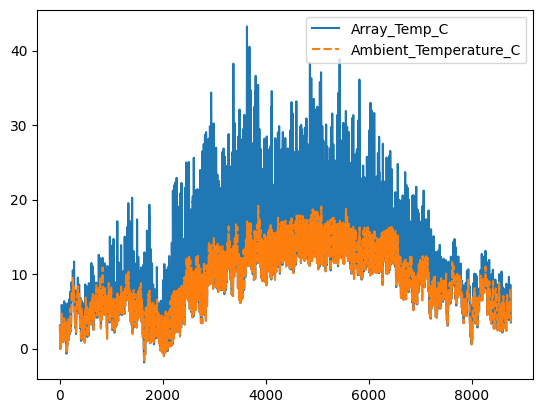

In [50]:
sns.lineplot(pv_model.models[0]["model_result"][["Array_Temp_C", "Ambient_Temperature_C"]])

In [51]:
px.line(pv_model.models[0]["model_result"][["ET_HRad_kWm2", "E_POA_kWm2"]])

<Axes: >

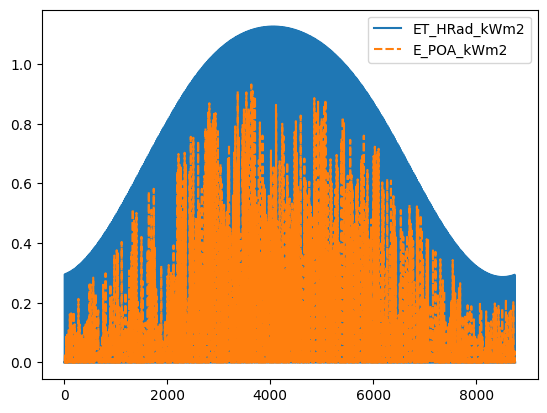

In [52]:
sns.lineplot(pv_model.models[0]["model_result"][["ET_HRad_kWm2", "E_POA_kWm2"]])

# ***VISUAL TESTING***

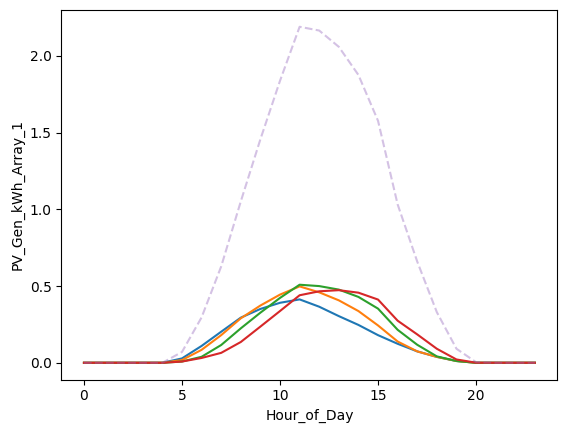

In [53]:
variables = ['E_Beam_kWm2', 'E_Diffuse_kWm2', 'E_Ground_kWm2', 'E_POA_kWm2', 'ET_HRad_kWm2', 
            'Array_Temp_C', 'PV_Gen_kWh', 'AOI', 'Zenith_Angle']

testy = pv_model.all_models

variable = "PV_Gen_kWh"

variable_1 = f"{variable}_Array_1"
variable_2 = f"{variable}_Array_2"
variable_3 = f"{variable}_Array_3"
variable_4 = f"{variable}_Array_4"
variable_7 = f"{variable}_Total"
variable_8 = f"{variable}_Avg"

if variable_1 in testy:
    sns.lineplot(testy.groupby("Hour_of_Day")[variable_1].mean())
if variable_2 in testy:
    sns.lineplot(testy.groupby("Hour_of_Day")[variable_2].mean())
if variable_3 in testy:
    sns.lineplot(testy.groupby("Hour_of_Day")[variable_3].mean())
if variable_4 in testy:
    sns.lineplot(testy.groupby("Hour_of_Day")[variable_4].mean())
if variable_7 in testy:
    sns.lineplot(testy.groupby("Hour_of_Day")[variable_7].mean(), alpha=0.4, ls="--")
if variable_8 in testy:
    sns.lineplot(testy.groupby("Hour_of_Day")[variable_8].mean(), alpha=0.4, ls="--")

<Axes: ylabel='Array_Temp_C_Avg'>

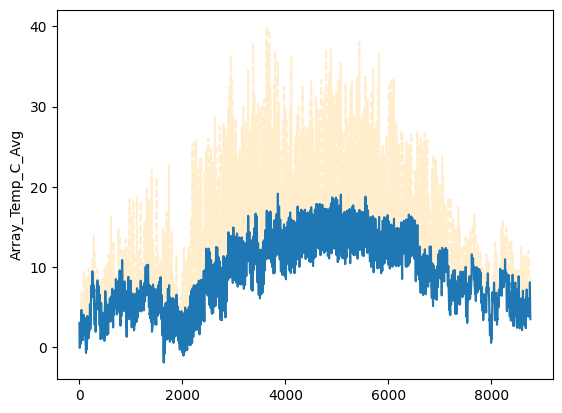

In [54]:
sns.lineplot(pv_model.combined_model["Array_Temp_C_Avg"], alpha = 0.2, ls = "--", color = "orange")
sns.lineplot(pv_model.combined_model["Ambient_Temperature_C"])

2024-04-15 20:43:30,433 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-04-15 20:43:30,438 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='Hour_of_Day', ylabel='Array_Temp_C_Avg'>

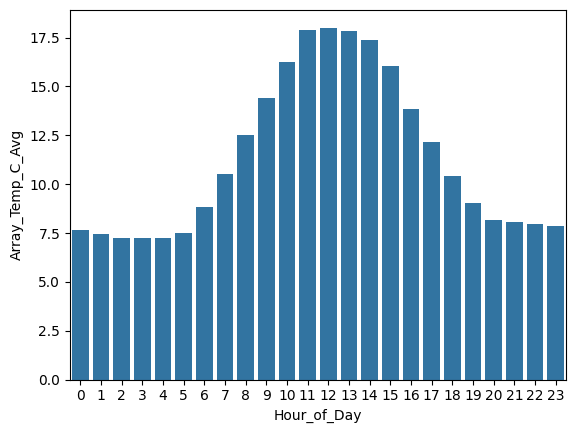

In [55]:
sns.barplot(pv_model.grouped.hourly.Array_Temp_C_Avg)

<Axes: xlabel='Hour_of_Day', ylabel='PV_Gen_kWh_Total'>

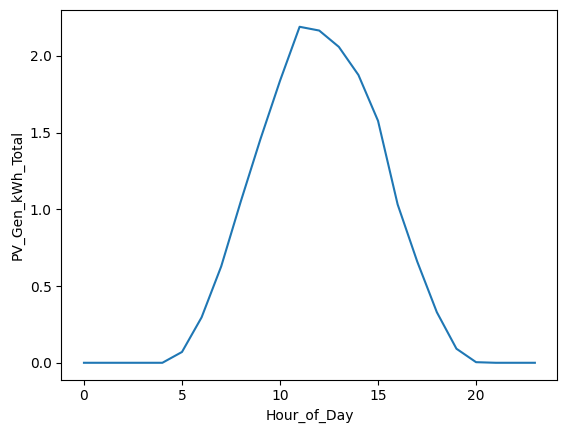

In [56]:
sns.lineplot(pv_model.combined_model.groupby("Hour_of_Day")["PV_Gen_kWh_Total"].mean())

In [57]:
pv_model.all_models["PV_Gen_kWh_Total"].sum()

6322.910262793382

In [58]:
pv_model.all_models.columns

Index(['E_Beam_kWm2_Array_1', 'E_Diffuse_kWm2_Array_1',
       'E_Ground_kWm2_Array_1', 'E_POA_kWm2_Array_1', 'Panel_POA_kWm2_Array_1',
       'ET_HRad_kWm2_Array_1', 'Array_Temp_C_Array_1', 'PV_Gen_kWh_Array_1',
       'PV_Thermal_Loss_kWh_Array_1', 'Low_Light_Loss_kWh_Array_1',
       'IAM_Loss_kWh_Array_1', 'Combined_PV_Losses_kWh_Array_1', 'AOI_Array_1',
       'Zenith_Angle_Array_1', 'E_Beam_kWm2_Array_2', 'E_Diffuse_kWm2_Array_2',
       'E_Ground_kWm2_Array_2', 'E_POA_kWm2_Array_2', 'Panel_POA_kWm2_Array_2',
       'ET_HRad_kWm2_Array_2', 'Array_Temp_C_Array_2', 'PV_Gen_kWh_Array_2',
       'PV_Thermal_Loss_kWh_Array_2', 'Low_Light_Loss_kWh_Array_2',
       'IAM_Loss_kWh_Array_2', 'Combined_PV_Losses_kWh_Array_2', 'AOI_Array_2',
       'Zenith_Angle_Array_2', 'E_Beam_kWm2_Array_3', 'E_Diffuse_kWm2_Array_3',
       'E_Ground_kWm2_Array_3', 'E_POA_kWm2_Array_3', 'Panel_POA_kWm2_Array_3',
       'ET_HRad_kWm2_Array_3', 'Array_Temp_C_Array_3', 'PV_Gen_kWh_Array_3',
       'PV_Therma

<Axes: ylabel='PV_Thermal_Loss_kWh_Total'>

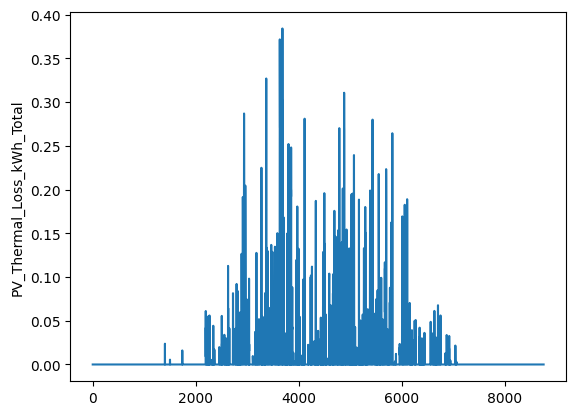

In [59]:
sns.lineplot(pv_model.all_models["PV_Thermal_Loss_kWh_Total"])

In [60]:
temp_losses = (pv_model.all_models["PV_Thermal_Loss_kWh_Total"].sum() / pv_model.all_models["PV_Gen_kWh_Total"].sum() * 100)

print(f"{round(temp_losses, 3)}% change to power due to temperature losses")

0.814% change to power due to temperature losses


In [61]:
pv_model.models[0]["model_result"]

,Hour_of_Day,Day_of_Year,Week_of_Year,Month_of_Year,Wind_Speed_ms,Ambient_Temperature_C,Declination_Angle,Solar_Time,Hour_Angle,AOI,...,E_POA_kWm2,Panel_POA_kWm2,IAM_Loss_kWh,ET_HRad_kWm2,PV_Derated_Eff,Array_Temp_C,PV_Gen_kWh,PV_Thermal_Loss_kWh,Low_Light_Loss_kWh,Combined_PV_Losses_kWh
0,0,1,1,1,5.700,3.070,-23.012,0.056,-179.155,133.623,...,0.000,0.000,0.000,0.000,1.000,3.070,0.000,0.000,0.000,0.000
1,1,1,1,1,5.730,2.630,-23.012,1.056,-164.155,122.480,...,0.000,0.000,0.000,0.000,1.000,2.630,0.000,0.000,0.000,0.000
2,2,1,1,1,5.770,2.180,-23.012,2.056,-149.155,111.426,...,0.000,0.000,-0.000,0.000,1.000,2.180,0.000,0.000,0.000,0.000
3,3,1,1,1,5.800,1.730,-23.012,3.056,-134.155,100.747,...,0.000,0.000,-0.000,0.000,1.000,1.730,0.000,0.000,0.000,0.000
4,4,1,1,1,5.840,1.280,-23.012,4.056,-119.155,90.730,...,0.000,0.000,-0.000,0.000,1.000,1.280,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,365,52,12,5.520,5.310,-23.086,19.064,105.958,152.766,...,0.000,0.000,-0.000,0.000,0.995,5.310,0.000,0.000,0.000,0.000
8756,20,365,52,12,5.550,4.860,-23.086,20.064,120.958,159.857,...,0.000,0.000,-0.000,0.000,0.995,4.860,0.000,0.000,0.000,0.000
8757,21,365,52,12,5.590,4.410,-23.086,21.064,135.958,160.457,...,0.000,0.000,-0.000,0.000,0.995,4.410,0.000,0.000,0.000,0.000
8758,22,365,52,12,5.630,3.970,-23.086,22.064,150.958,154.101,...,0.000,0.000,-0.000,0.000,0.995,3.970,0.000,0.000,0.000,0.000


In [62]:
pv_model.all_models

,E_Beam_kWm2_Array_1,E_Diffuse_kWm2_Array_1,E_Ground_kWm2_Array_1,E_POA_kWm2_Array_1,Panel_POA_kWm2_Array_1,ET_HRad_kWm2_Array_1,Array_Temp_C_Array_1,PV_Gen_kWh_Array_1,PV_Thermal_Loss_kWh_Array_1,Low_Light_Loss_kWh_Array_1,...,Combined_PV_Losses_kWh_Total,Declination_Angle,Solar_Time,Hour_Angle,Ambient_Temperature_C,Wind_Speed_ms,Hour_of_Day,Day_of_Year,Week_of_Year,Month_of_Year
0,0.000,0.000,0.000,0.000,0.000,0.000,3.070,0.000,0.000,0.000,...,0.000,-23.012,0.056,-179.155,3.070,5.700,0,1,1,1
1,0.000,0.000,0.000,0.000,0.000,0.000,2.630,0.000,0.000,0.000,...,0.000,-23.012,1.056,-164.155,2.630,5.730,1,1,1,1
2,0.000,0.000,0.000,0.000,0.000,0.000,2.180,0.000,0.000,0.000,...,0.000,-23.012,2.056,-149.155,2.180,5.770,2,1,1,1
3,0.000,0.000,0.000,0.000,0.000,0.000,1.730,0.000,0.000,0.000,...,0.000,-23.012,3.056,-134.155,1.730,5.800,3,1,1,1
4,0.000,0.000,0.000,0.000,0.000,0.000,1.280,0.000,0.000,0.000,...,0.000,-23.012,4.056,-119.155,1.280,5.840,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.000,0.000,0.000,0.000,0.000,0.000,5.310,0.000,0.000,0.000,...,0.000,-23.086,19.064,105.958,5.310,5.520,19,365,52,12
8756,0.000,0.000,0.000,0.000,0.000,0.000,4.860,0.000,0.000,0.000,...,0.000,-23.086,20.064,120.958,4.860,5.550,20,365,52,12
8757,0.000,0.000,0.000,0.000,0.000,0.000,4.410,0.000,0.000,0.000,...,0.000,-23.086,21.064,135.958,4.410,5.590,21,365,52,12
8758,0.000,0.000,0.000,0.000,0.000,0.000,3.970,0.000,0.000,0.000,...,0.000,-23.086,22.064,150.958,3.970,5.630,22,365,52,12


In [63]:
pv_model.summary

Total_PV_Capacity_kWp                7.076
PV_kWh_kWp_Annual                  893.571
Total_Area_Covered_m2               40.000
PV_kWh_m2_Annual                   158.073
PV_Gen_kWh_Annual                 6322.910
PV_Gen_kWh_Lifetime             148209.017
E_POA_kWm2_Annual                  956.222
Panel_POA_kWm2_Annual              944.607
IAM_Loss_kWh_Annual                 77.775
PV_Thermal_Loss_kWh_Annual          51.480
Low_Light_Loss_kWh_Annual          293.198
Combined_PV_Losses_kWh_Annual      422.453
E_Beam_kWm2_Annual                 421.631
E_Diffuse_kWm2_Annual              517.524
E_Ground_kWm2_Annual                17.067
ET_HRad_kWm2_Annual               2270.579
Array_Temp_C_Avg                    11.311
Ambient_Temperature_C_Avg            8.899
dtype: float64

In [64]:
pv_model.grouped.daily

,PV_Gen_kWh_Total,E_POA_kWm2_Avg,Panel_POA_kWm2_Avg,IAM_Loss_kWh_Total,PV_Thermal_Loss_kWh_Total,Low_Light_Loss_kWh_Total,Combined_PV_Losses_kWh_Total,E_Beam_kWm2_Avg,E_Diffuse_kWm2_Avg,E_Ground_kWm2_Avg,ET_HRad_kWm2_Avg,Array_Temp_C_Avg,Ambient_Temperature_C
Day_of_Year,,,,,,,,,,,,,
1,0.611,0.108,0.108,0.000,0.000,0.154,0.154,0.000,0.106,0.002,1.382,1.513,1.417
2,2.229,0.379,0.372,0.045,0.000,0.404,0.449,0.143,0.230,0.006,1.395,2.824,2.522
3,2.148,0.362,0.355,0.046,0.000,0.367,0.413,0.148,0.209,0.006,1.412,2.005,1.600
4,3.810,0.624,0.607,0.113,0.000,0.484,0.597,0.338,0.278,0.008,1.429,3.270,2.676
5,4.660,0.756,0.731,0.167,0.000,0.508,0.675,0.463,0.283,0.010,1.448,2.803,2.215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,5.561,0.898,0.865,0.213,0.000,0.531,0.744,0.595,0.293,0.011,1.338,4.477,3.663
362,4.489,0.723,0.700,0.148,0.000,0.443,0.591,0.411,0.302,0.010,1.344,5.355,4.654
363,2.037,0.349,0.342,0.044,0.000,0.372,0.416,0.123,0.220,0.006,1.352,5.824,5.499


In [65]:
pv_model.summary

Total_PV_Capacity_kWp                7.076
PV_kWh_kWp_Annual                  893.571
Total_Area_Covered_m2               40.000
PV_kWh_m2_Annual                   158.073
PV_Gen_kWh_Annual                 6322.910
PV_Gen_kWh_Lifetime             148209.017
E_POA_kWm2_Annual                  956.222
Panel_POA_kWm2_Annual              944.607
IAM_Loss_kWh_Annual                 77.775
PV_Thermal_Loss_kWh_Annual          51.480
Low_Light_Loss_kWh_Annual          293.198
Combined_PV_Losses_kWh_Annual      422.453
E_Beam_kWm2_Annual                 421.631
E_Diffuse_kWm2_Annual              517.524
E_Ground_kWm2_Annual                17.067
ET_HRad_kWm2_Annual               2270.579
Array_Temp_C_Avg                    11.311
Ambient_Temperature_C_Avg            8.899
dtype: float64

In [66]:
pv_model.grouped.monthly

,PV_Gen_kWh_Total,E_POA_kWm2_Avg,Panel_POA_kWm2_Avg,IAM_Loss_kWh_Total,PV_Thermal_Loss_kWh_Total,Low_Light_Loss_kWh_Total,Combined_PV_Losses_kWh_Total,E_Beam_kWm2_Avg,E_Diffuse_kWm2_Avg,E_Ground_kWm2_Avg,ET_HRad_kWm2_Avg,Array_Temp_C_Avg,Ambient_Temperature_C
Month_of_Year,,,,,,,,,,,,,
1,141.050,22.584,21.960,4.126,0.000,14.283,18.409,12.564,9.710,0.310,55.033,4.525,3.964
2,251.905,39.015,38.239,5.205,0.024,18.446,23.675,19.918,18.498,0.600,89.614,7.044,5.736
3,288.928,45.049,44.680,2.520,0.025,26.845,29.390,12.095,32.152,0.802,171.684,4.604,3.241
4,770.011,114.434,113.161,8.617,1.778,27.716,38.110,53.290,59.089,2.055,247.681,10.353,6.774
5,1024.263,152.237,150.654,10.619,9.816,29.903,50.338,72.355,77.046,2.836,324.054,15.458,11.035
6,899.689,135.273,134.016,8.376,12.338,34.085,54.799,55.340,77.351,2.583,343.343,17.415,13.222
7,880.176,132.361,131.213,7.654,11.035,34.710,53.399,47.446,82.399,2.516,339.285,18.302,14.425
8,860.412,129.467,128.065,9.357,11.441,31.486,52.284,57.414,69.696,2.357,280.979,17.901,13.902
9,561.004,85.018,83.973,7.014,4.141,26.959,38.114,38.404,45.139,1.475,193.464,15.261,12.699


# ***EXPERIMENTAL***

# Low Light Losses Visualisation Test

In [67]:
import numpy as np
import plotly.express as px

# Define the modified logistic function
def calc_low_light_losses(pv_kwp, e_poa, k=0.0075, midpoint=25):
    """
    Modified logistic function to calculate efficiency based on irradiance,
    with a minimum efficiency level.

    Parameters:
    pv_kwp (float): The rated solar PV size (kWp).
    e_poa (float): The irradiance incident on array (W/m2).
    k (float): The steepness of the curve.
    midpoint (float): The irradiance at which the efficiency is at its midpoint.

    Returns:
    float: The calculated efficiency at the given irradiance.
    """
    pv_kwp_min = pv_kwp * 0.6
    eff = pv_kwp_min + (pv_kwp - pv_kwp_min) / (1 + np.exp(-k * (e_poa - midpoint)))
    return eff


# Generate a range of irradiance values from 0 to 1000 W/m2 and set L to 1 kWp
L = 1
irradiance_range = np.linspace(0, 1000, 1001)
efficiencies = calc_low_light_losses(L, irradiance_range)

# Plot Graph of results
fig = px.line(efficiencies[:], y=efficiencies[:], x = irradiance_range[:])

fig.update_layout(xaxis_title="Irradiation (W/m2)", yaxis_title="kWp Output",
                  title = "Line graph showing PV kWp output due to low irradiance losses")

In [68]:
calc_low_light_losses(1, 200)

0.9151724782571579

In [69]:
px.bar(pv_model.grouped.monthly[["PV_Gen_kWh_Total", "IAM_Loss_kWh_Total", 
                                         "PV_Thermal_Loss_kWh_Total", "Low_Light_Loss_kWh_Total"]])

In [70]:
pv_model.grouped.hourly.columns

Index(['PV_Gen_kWh_Total', 'E_POA_kWm2_Avg', 'Panel_POA_kWm2_Avg',
       'IAM_Loss_kWh_Total', 'PV_Thermal_Loss_kWh_Total',
       'Low_Light_Loss_kWh_Total', 'Combined_PV_Losses_kWh_Total',
       'E_Beam_kWm2_Avg', 'E_Diffuse_kWm2_Avg', 'E_Ground_kWm2_Avg',
       'ET_HRad_kWm2_Avg', 'Array_Temp_C_Avg', 'Ambient_Temperature_C'],
      dtype='object')

# Temperature Tests

In [71]:
import math

def calc_array_temp_homer(
    e_poa,
    ambient_temp,
    cell_temp_coeff=-0.0035,
    electrical_eff=0.21,
    cell_NOCT=42,
    ambient_NOCT=20,
    e_poa_NOCT=800,
    cell_temp_STC=25,
    transmittance_absorptance=0.9,
):
    """Calculates the cell temperature of a PV panel.

    Parameters:
    - e_poa: Plane of array irradiance in kW/m^2.
    - ambient_temp: Ambient temperature in degrees Celsius.
    - cell_temp_coeff: Temperature coefficient of the PV cell.
    - electrical_eff: Electrical efficiency of the PV panel.
    - cell_NOCT, ambient_NOCT: Nominal operating cell temperature and the corresponding ambient temperature.
    - e_poa_NOCT: Irradiance at NOCT conditions in W/m^2.
    - cell_temp_STC: Cell temperature at standard test conditions in degrees Celsius.
    - transmittance_absorptance: Transmittance and absorptance product of the PV panel.

    Returns:
    - Cell temperature of the PV panel.
    """
    temp_factor = (cell_NOCT - ambient_NOCT) * ((e_poa * 1000) / e_poa_NOCT)
    numerator = ambient_temp + temp_factor * (
        1
        - (electrical_eff * (1 - cell_temp_coeff * cell_temp_STC))
        / transmittance_absorptance
    )
    denominator = 1 + temp_factor * (
        cell_temp_coeff * electrical_eff / transmittance_absorptance
    )

    return numerator / denominator


def calc_array_temp_pvsyst(e_poa, ambient_temp, windspeed, uc=29, uv=1.2):
    u = uc + (uv * windspeed)
    tcell = ambient_temp + (1/u) * (0.9 * e_poa * 1000 * (1-0.21))
    return tcell

def calc_array_temp_sandia(e_poa: float, ambient_temp: float, wind_speed: float, 
                           a: float = -3.47, b: float = -0.0594) -> float:
    """
    Calculate the temperature of a photovoltaic (PV) array based on the Sandia method.
    
    Parameters:
    - e_poa (float): Plane of array irradiance in kW/m^2. Represents the solar irradiance incident on the PV array.
    - ambient_temp (float): Ambient temperature in degrees Celsius.
    - wind_speed (float): Wind speed in m/s at the site of the PV array.
    - a (float): Coefficient a in the exponential model, defaulting to -3.47.
    - b (float): Coefficient b in the exponential model, defaulting to -0.0594.
    
    Returns:
    - float: Estimated temperature of the PV array in degrees Celsius.
    """
    array_temp = e_poa * 1000 * math.exp(a + b * wind_speed) + ambient_temp
    return array_temp

def calc_array_temp_faiman(e_poa, ambient_temp, wind_speed, U_0=25, U_1=6.84):
    array_temp = ambient_temp + (e_poa * 1000 / (U_0 + U_1 * wind_speed))
    return array_temp


# Example usage:
e_poa=0.5
ambient_temp=25
wind_speed=1

list_1 = []
list_2 = []
list_3 = []
list_4 = []
list_5 = []


print("")
wind_speed=10
for i in range(1):
    cell_temperature = calc_array_temp_homer(e_poa, ambient_temp)
    print(f"The cell temperature is {cell_temperature:.2f}°C from the Homer model with {wind_speed}m/s windspeed")
    list_2.append(cell_temperature)
    wind_speed += 1

print("")
wind_speed=0
for i in range(26):
    cell_temperature = calc_array_temp_pvsyst(e_poa, ambient_temp, wind_speed)
    print(f"The cell temperature is {cell_temperature:.2f}°C from the PVSyst model with {wind_speed}m/s windspeed")
    list_3.append(cell_temperature)
    wind_speed += 1

print("")
wind_speed=0
for i in range(26):
    cell_temperature = calc_array_temp_sandia(e_poa, ambient_temp, wind_speed)
    print(f"The cell temperature is {cell_temperature:.2f}°C from the Sandia model with {wind_speed}m/s windspeed")
    list_4.append(cell_temperature)
    wind_speed += 1

print("")
wind_speed=0
for i in range(26):
    cell_temperature = calc_array_temp_faiman(e_poa, ambient_temp, wind_speed)
    print(f"The cell temperature is {cell_temperature:.2f}°C from the Faiman model with {wind_speed}m/s windspeed")
    list_5.append(cell_temperature)
    wind_speed += 1


The cell temperature is 35.66°C from the Homer model with 10m/s windspeed

The cell temperature is 37.26°C from the PVSyst model with 0m/s windspeed
The cell temperature is 36.77°C from the PVSyst model with 1m/s windspeed
The cell temperature is 36.32°C from the PVSyst model with 2m/s windspeed
The cell temperature is 35.90°C from the PVSyst model with 3m/s windspeed
The cell temperature is 35.52°C from the PVSyst model with 4m/s windspeed
The cell temperature is 35.16°C from the PVSyst model with 5m/s windspeed
The cell temperature is 34.82°C from the PVSyst model with 6m/s windspeed
The cell temperature is 34.51°C from the PVSyst model with 7m/s windspeed
The cell temperature is 34.21°C from the PVSyst model with 8m/s windspeed
The cell temperature is 33.93°C from the PVSyst model with 9m/s windspeed
The cell temperature is 33.67°C from the PVSyst model with 10m/s windspeed
The cell temperature is 33.42°C from the PVSyst model with 11m/s windspeed
The cell temperature is 33.19°C fr

In [72]:
# %%timeit
# cell_temperature = calc_array_temp_homer(e_poa, ambient_temp)

# 419 ns ± 1.04 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

In [73]:
# %%timeit
# cell_temperature = calc_array_temp_faiman(e_poa, ambient_temp, wind_speed)

# 189 ns ± 1.23 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)

In [74]:
# %%timeit
# cell_temperature = calc_array_temp_sandia(e_poa, ambient_temp, wind_speed)

# 227 ns ± 6.55 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

In [75]:
# %%timeit
# cell_temperature = calc_array_temp_pvsyst(e_poa, ambient_temp, wind_speed)

# 256 ns ± 1.37 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)